In [4]:
from glob import glob

len(glob("../DATASETS/Cityspaces/images/train/*/*"))
# !ls ../DATASETS/Cityspaces/images/train/*/*

2975

In [5]:
# !rm -r Dataset

In [5]:
!mkdir Dataset
!mkdir Dataset/images
!mkdir Dataset/masks

!mkdir Dataset/Test
!mkdir Dataset/Test/images
!mkdir Dataset/Test/masks

!cp ../DATASETS/Cityspaces/images/train/*/*  Dataset/images/
!cp ../DATASETS/Cityspaces/gtFine/train/*/*_gtFine_labelTrainIds.png  Dataset/masks/

!cp ../DATASETS/Cityspaces/images/val/*/*  Dataset/Test/images/
!cp ../DATASETS/Cityspaces/gtFine/val/*/*_gtFine_labelTrainIds.png  Dataset/Test/masks/

In [6]:
i = !ls Dataset/images/
l = !ls Dataset/masks/

test_i = !ls Dataset/Test/images/
test_l = !ls Dataset/Test/masks/
len(i), len(l),len(test_i), len(test_l)

(2975, 2975, 500, 500)

In [7]:
l[-5:], i[-5:]

(['zurich_000117_000019_gtFine_labelTrainIds.png',
  'zurich_000118_000019_gtFine_labelTrainIds.png',
  'zurich_000119_000019_gtFine_labelTrainIds.png',
  'zurich_000120_000019_gtFine_labelTrainIds.png',
  'zurich_000121_000019_gtFine_labelTrainIds.png'],
 ['zurich_000117_000019_leftImg8bit.png',
  'zurich_000118_000019_leftImg8bit.png',
  'zurich_000119_000019_leftImg8bit.png',
  'zurich_000120_000019_leftImg8bit.png',
  'zurich_000121_000019_leftImg8bit.png'])

In [9]:
import cv2
from glob import glob
import os
import numpy as np

l = glob('Dataset/masks/*')
m = cv2.imread(l[2970],0)
m.shape
np.unique(m)

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  10,  13, 255],
      dtype=uint8)

In [10]:
def mask_mapping(path='Dataset/masks/*'):
    for i, filepath in enumerate(glob(path)):
        img = cv2.imread(filepath,0)    
        img = np.where(img == 0 , 101, img)
        img = np.where(img == 1 , 100, img)

        for j in [11,12,13,14,15,16,17,18]:
            img = np.where(img == j , 102, img)

        for j in [5,6,7]:
            img = np.where(img == j , 100, img)

        for j in [2,3,4,8,9,10,255]:
            img = np.where(img == j , 100, img)
        img = img%100

        cv2.imwrite(filepath, img)      
        if i<5:
            print(np.unique(img))

mask_mapping(path='Dataset/masks/*')
mask_mapping(path='Dataset/Test/masks/*')

[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]


In [13]:
len(os.listdir('Dataset/images/')), len(os.listdir('Dataset/Test/images/'))

(2975, 500)

In [14]:
len(os.listdir('Dataset/masks/')), len(os.listdir('Dataset/Test/masks/'))

(2975, 500)

[0. 1. 2.]


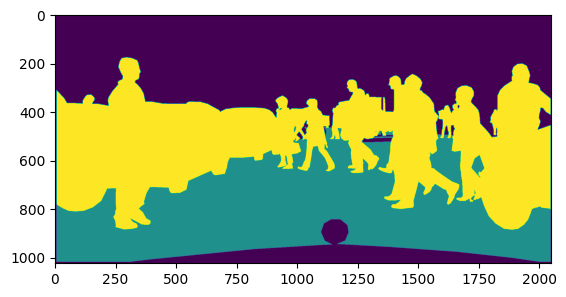

[0. 1. 2.]


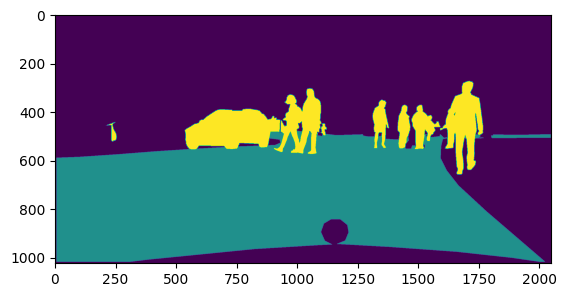

In [15]:
import matplotlib.pyplot as plt
import numpy as np
for i in glob('Dataset/masks/*')[:2]:
    t = cv2.imread(i,0)
    t = t.astype(np.float32)
    print(np.unique(t))
    plt.imshow(t)
    plt.show()

[0. 1. 2.]


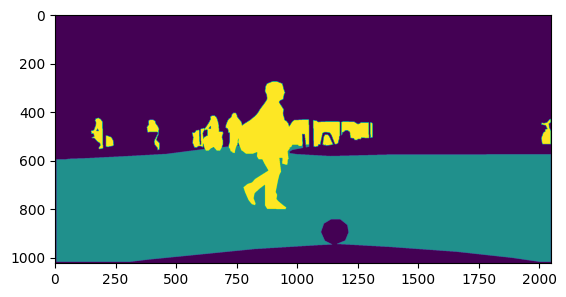

[0. 1. 2.]


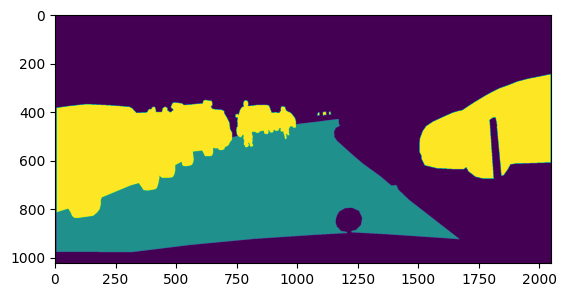

In [16]:
for i in glob('Dataset/Test/masks/*')[:2]:
    t = cv2.imread(i,0)
    t = t.astype(np.float32)
    print(np.unique(t))
    plt.imshow(t)
    plt.show()